**Prática de Segmentação de imagens**

In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

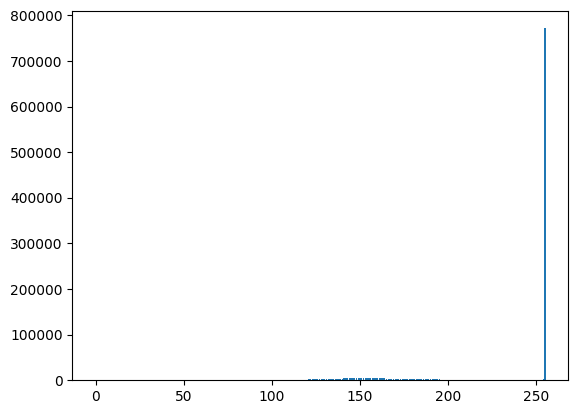

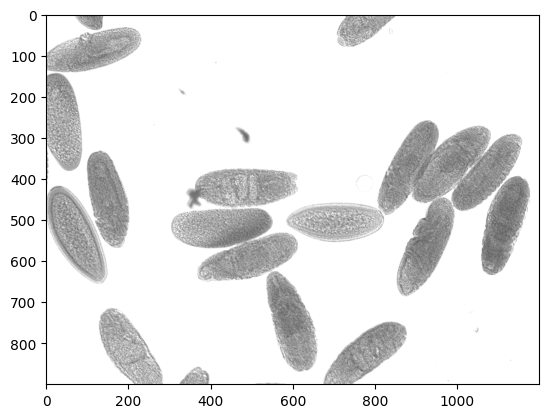

In [23]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

pixels = []
values = [0] * 256

u1 = 0
u2 = 1

for a in range(256):
    pixels.append(a)

for x in range(len(img1)):
        for y in range(len(img1[x])):
            values[img1[x][y]] += 1

plt.bar(pixels, values)
plt.show()

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

Text(0.5, 1.0, 'Limiarização Adaptativa Pré Suavizada')

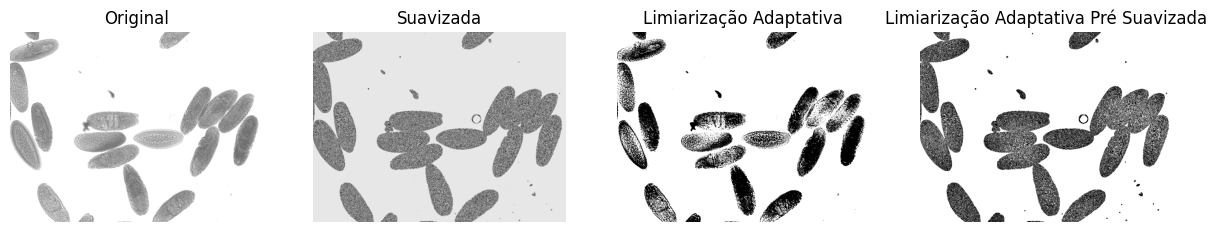

In [5]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

img1_smt = ndimage.convolve(img1, [[1] * 5] * 5)

h, w = img1.shape

S = w/8
s2 = S/2
T = 15

#integral img
int_img = cv2.integral(img1);
int_img_smt = cv2.integral(img1_smt);

#output img
out_img = np.zeros_like(img1)   
out_img_smt = np.zeros_like(img1_smt)    

for col in range(w):
    for row in range(h):
        #SxS region
        y0 = int(max(row-s2, 0))
        y1 = int(min(row+s2, h-1))
        x0 = int(max(col-s2, 0))
        x1 = int(min(col+s2, w-1))

        count = (y1-y0)*(x1-x0)

        sum_ = int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0]
        sum_smt = int_img_smt[y1, x1]-int_img_smt[y0, x1]-int_img_smt[y1, x0]+int_img_smt[y0, x0]

        if img1[row, col]*count < sum_*(100.-T)/100.:
            out_img[row,col] = 0
        else:
            out_img[row,col] = 255

        if img1_smt[row, col]*count < sum_*(100.-T)/100.:
            out_img_smt[row,col] = 0
        else:
            out_img_smt[row,col] = 255

fig = plt.figure(figsize=(15, 45))
rows = 1
columns = 4

fig.add_subplot(rows, columns, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(img1_smt, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Suavizada")

fig.add_subplot(rows, columns, 3)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Limiarização Adaptativa")

fig.add_subplot(rows, columns, 4)
plt.imshow(out_img_smt, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Limiarização Adaptativa Pré Suavizada")


3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

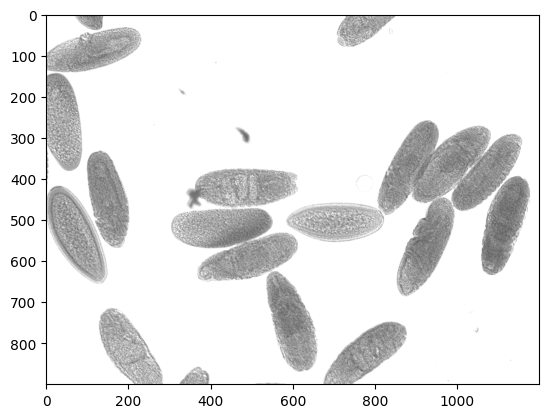

In [6]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

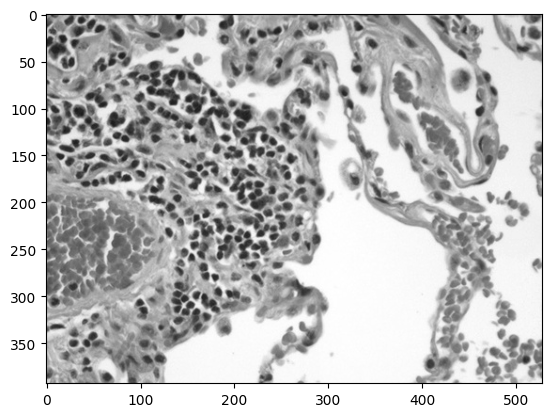

In [7]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);